Team members: Taleen Barakeh, Riley Nickel and Lior Ben David

Contribution:
- Initial understanding of the data- everyone
- Visualizations- each one of us did a few
- Basic statistics- Taleen
- Handling missing values- Riley and Lior
- Handling outliers- Riley
- Encoding- Lior
- Normalization and scaling- Lior
- Post processing (collinearity & feature selection)- Riley

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# access to data file
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

# Part 1- Data Understanding

Initial understanding of the data (everyone contributed)

In [ ]:
# display top 5 rows to understand structure
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# shape of the dataset
df.shape

(1460, 81)

In [ ]:
# dataset columns data types
pd.set_option('display.max_rows', None)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# check for missing values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Visualizations

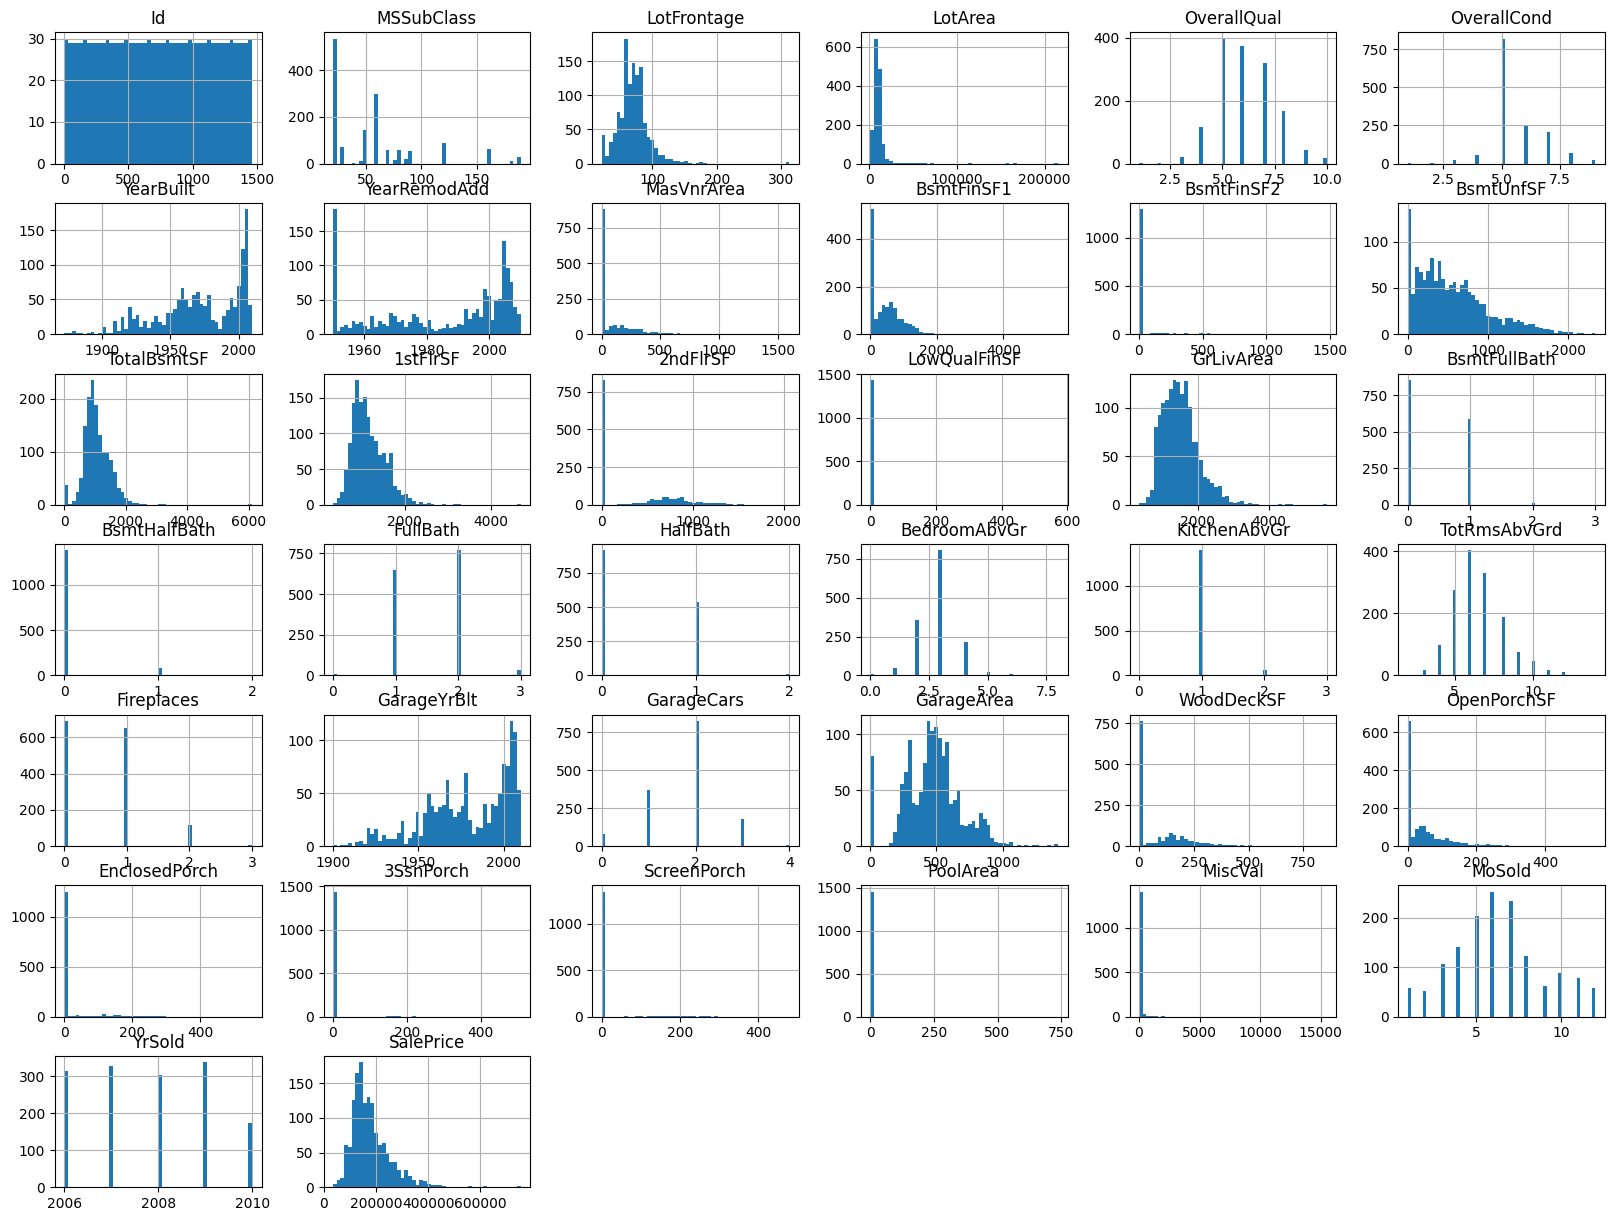

In [ ]:
# Taleen
# Histogram matrix
df.hist(bins=50, figsize=(20,15))
plt.show()

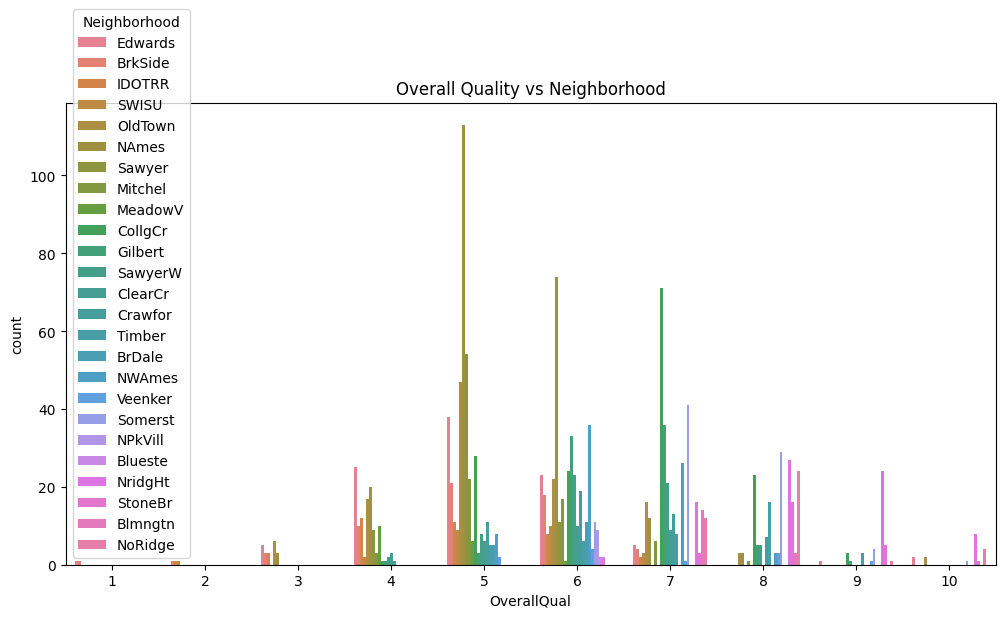

In [ ]:
# Taleen
# countplot to visualize the count of a categorical column by the categories of another categorical column
plt.figure(figsize=(12, 6))
sns.countplot(x='OverallQual', hue='Neighborhood', data=df)
plt.title('Overall Quality vs Neighborhood')
plt.show()

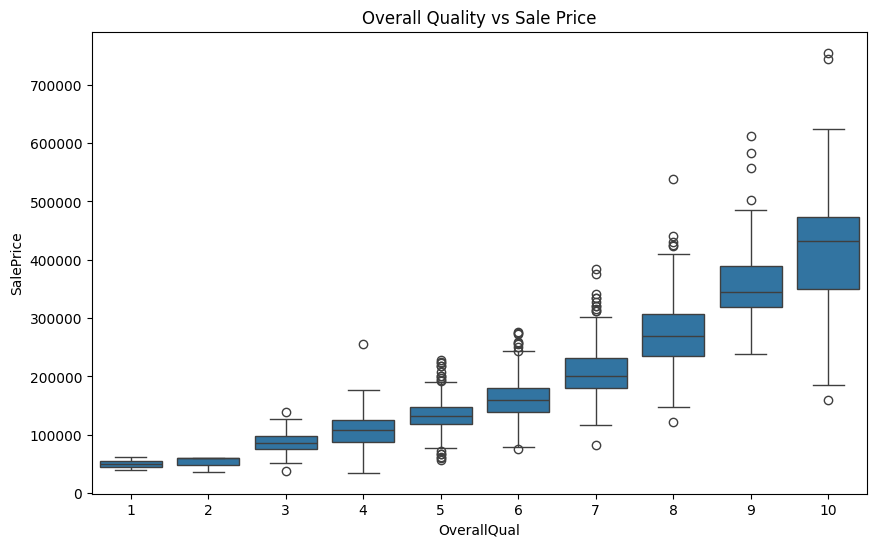

In [ ]:
# Taleen
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Overall Quality vs Sale Price')
plt.show()

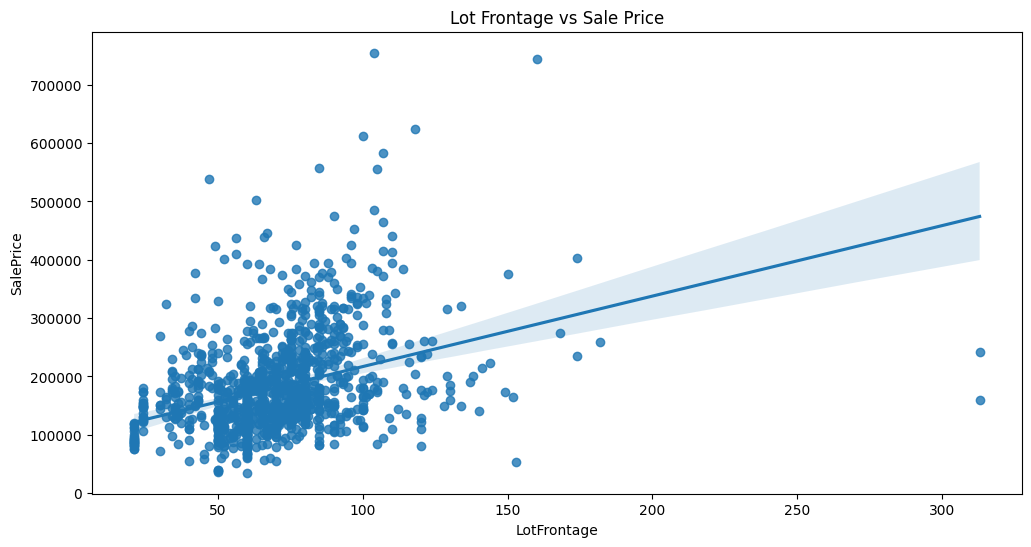

In [ ]:
# Taleen
# regression plot to show the relationship between two numeric columns
plt.figure(figsize=(12, 6))
sns.regplot(x='LotFrontage', y='SalePrice', data=df)
plt.title('Lot Frontage vs Sale Price')
plt.show()

Bar plot- building type


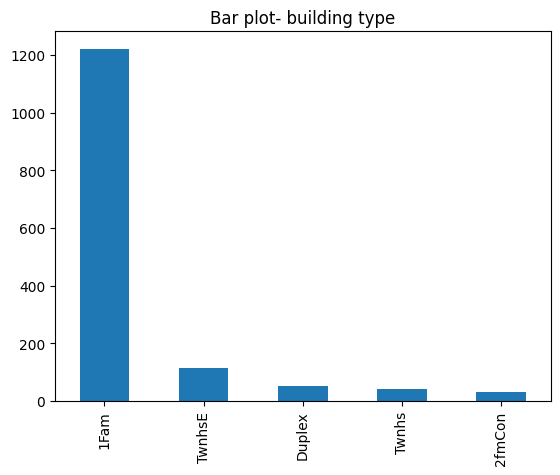

In [ ]:
# Lior
# bar chart for distribution of categorical column
print("Bar plot- building type")
df['BldgType'].value_counts().plot(kind='bar')
plt.title('Bar plot- building type')
plt.show()

Pairplot for numeric columns


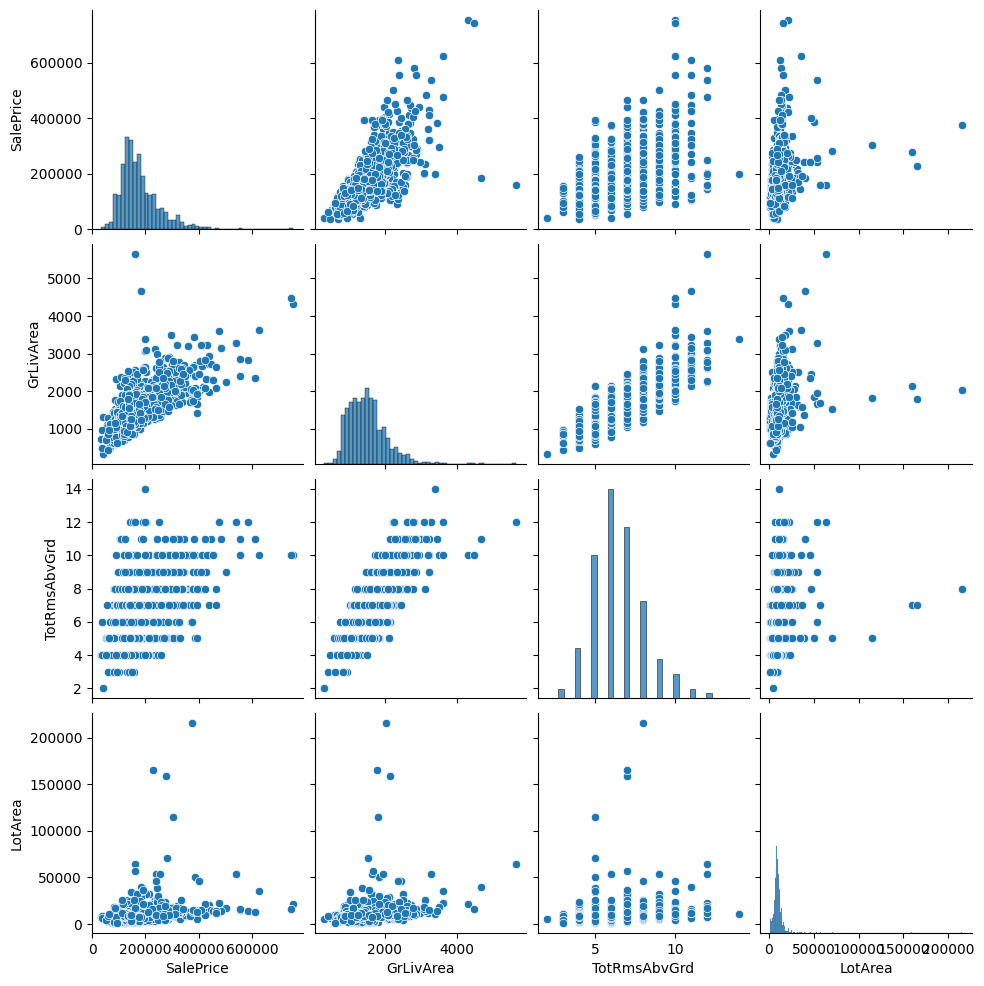

In [ ]:
# Lior
# pairplot to visualize the relationships between multiple numeric columns
print('Pairplot for numeric columns')
sns.pairplot(df, vars=['SalePrice', 'GrLivArea', 'TotRmsAbvGrd', 'LotArea'])
plt.show()

facting grid- distribution of sale price by different house style


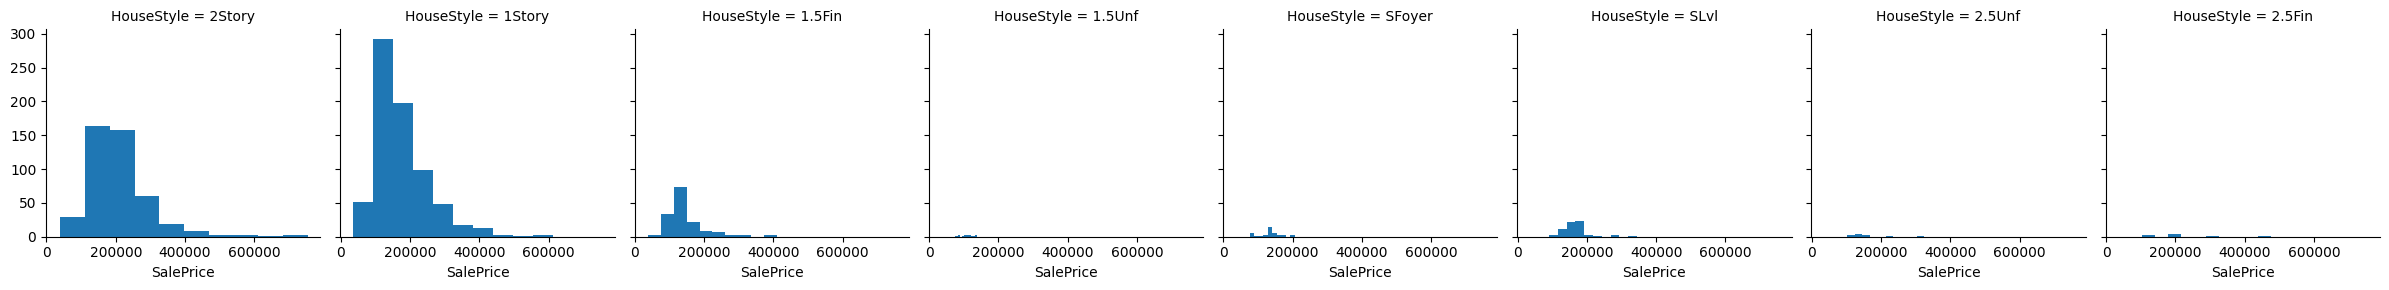

In [ ]:
# Lior
# create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
print('facting grid- distribution of sale price by different house style')
g = sns.FacetGrid(df, col='HouseStyle')
g.map(plt.hist, 'SalePrice')
plt.show()

displot for total basement sqft


<ipython-input-14-1e58c596f96d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalBsmtSF'])


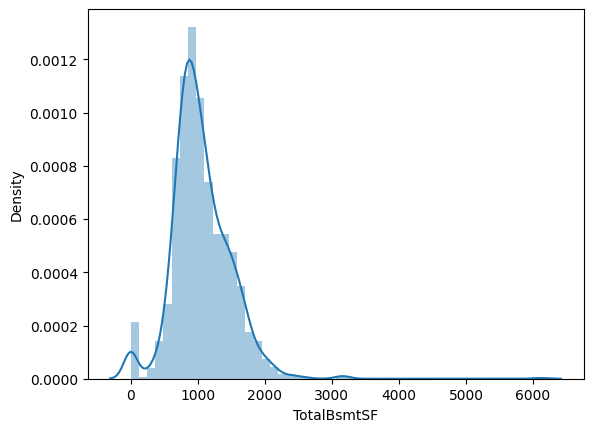

displot for garage area


<ipython-input-14-1e58c596f96d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GarageArea'])


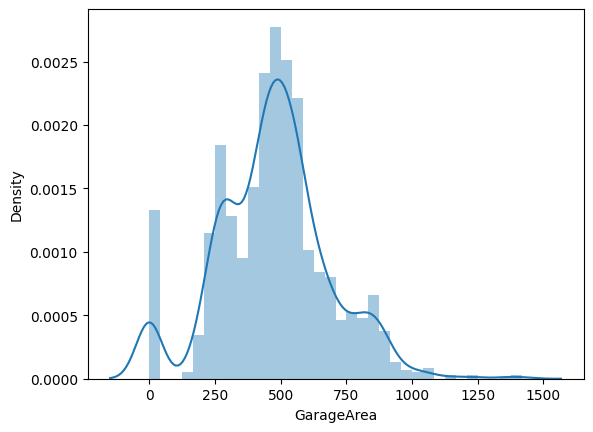

In [ ]:
# Lior
# distplot to visualize the distribution of a numeric column
print('displot for total basement sqft')
sns.distplot(df['TotalBsmtSF'])
plt.show()
print('displot for garage area')
sns.distplot(df['GarageArea'])
plt.show()

Basic statistics

In [ ]:
# basic statistics for numeric columns
df[['GrLivArea', 'BedroomAbvGr', 'LotArea', 'SalePrice', 'PoolArea', 'GarageArea', 'TotRmsAbvGrd', 'BedroomAbvGr','KitchenAbvGr', 'TotalBsmtSF']].describe()

,GrLivArea,BedroomAbvGr,LotArea,SalePrice,PoolArea,GarageArea,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,10516.828082,180921.195890,2.758904,472.980137,6.517808,2.866438,1.046575,1057.429452
std,525.480383,0.815778,9981.264932,79442.502883,40.177307,213.804841,1.625393,0.815778,0.220338,438.705324
min,334.000000,0.000000,1300.000000,34900.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1129.500000,2.000000,7553.500000,129975.000000,0.000000,334.500000,5.000000,2.000000,1.000000,795.750000
50%,1464.000000,3.000000,9478.500000,163000.000000,0.000000,480.000000,6.000000,3.000000,1.000000,991.500000
75%,1776.750000,3.000000,11601.500000,214000.000000,0.000000,576.000000,7.000000,3.000000,1.000000,1298.250000
max,5642.000000,8.000000,215245.000000,755000.000000,738.000000,1418.000000,14.000000,8.000000,3.000000,6110.000000


# Part 2- Pre Processing

In [ ]:
# create copy of original dataframe
df_preprocessed = df.copy()

Handling missing values

In [ ]:
print(df_preprocessed.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Impute missing values with 'mean'
df_preprocessed['LotFrontage'].fillna(df_preprocessed['LotFrontage'].mean(), inplace=True)

In [ ]:
# checking for Garage related missing values-
# are they missing because these houses don't have a garage?
garage = df_preprocessed[['BldgType', 'GarageArea','GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType']]
print(garage[garage['GarageArea']== 0])
print(garage[garage['GarageArea']== 0].shape)

     BldgType  GarageArea GarageCond GarageQual GarageFinish  GarageYrBlt  \
39     Duplex           0        NaN        NaN          NaN          NaN   
48     2fmCon           0        NaN        NaN          NaN          NaN   
78     Duplex           0        NaN        NaN          NaN          NaN   
88       1Fam           0        NaN        NaN          NaN          NaN   
89       1Fam           0        NaN        NaN          NaN          NaN   
99       1Fam           0        NaN        NaN          NaN          NaN   
108      1Fam           0        NaN        NaN          NaN          NaN   
125    2fmCon           0        NaN        NaN          NaN          NaN   
127      1Fam           0        NaN        NaN          NaN          NaN   
140      1Fam           0        NaN        NaN          NaN          NaN   
148      1Fam           0        NaN        NaN          NaN          NaN   
155      1Fam           0        NaN        NaN          NaN          NaN   

In [ ]:
# since the 81 rows are matching the number of the 81 missing values and they are all NaN for these columns
# these 81 houses just don't have a garage (garage area = 0)
# replace garage releated missing values with "NOGARAGE" instead of dropping them
garage_columns = ['GarageCond','GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType']
df_preprocessed[garage_columns] = df_preprocessed[garage_columns].fillna('NOGARAGE')

In [ ]:
# checking for Basement related missing values
# are they missing because these houses don't have a basement?
basement = df_preprocessed[['TotalBsmtSF', 'BsmtFinType2','BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond']]
print(basement[basement['TotalBsmtSF']== 0])
print(basement[basement['TotalBsmtSF']== 0].shape)

      TotalBsmtSF BsmtFinType2 BsmtFinType1 BsmtExposure BsmtQual BsmtCond
17              0          NaN          NaN          NaN      NaN      NaN
39              0          NaN          NaN          NaN      NaN      NaN
90              0          NaN          NaN          NaN      NaN      NaN
102             0          NaN          NaN          NaN      NaN      NaN
156             0          NaN          NaN          NaN      NaN      NaN
182             0          NaN          NaN          NaN      NaN      NaN
259             0          NaN          NaN          NaN      NaN      NaN
342             0          NaN          NaN          NaN      NaN      NaN
362             0          NaN          NaN          NaN      NaN      NaN
371             0          NaN          NaN          NaN      NaN      NaN
392             0          NaN          NaN          NaN      NaN      NaN
520             0          NaN          NaN          NaN      NaN      NaN
532             0        

In [ ]:
# since the number 37 doesn't match the 38 missing for BsmtFinType2 and BsmtExposure
# find the rows that are not in the table above that still have missing values
print(df_preprocessed[(df_preprocessed['TotalBsmtSF']!= 0) & df_preprocessed['BsmtExposure'].isna()])
print(df_preprocessed[(df_preprocessed['TotalBsmtSF']!= 0) & df_preprocessed['BsmtFinType2'].isna()])

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
948  949          60       RL         65.0    14006   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
948         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
948      2   2006        WD         Normal     192500  

[1 rows x 81 columns]
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
332         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
332     10   2009        WD         Normal     284000  

[1 rows x 81 columns]


In [ ]:
# drop these 2 rows using their id's
df_preprocessed = df_preprocessed[df_preprocessed['Id'] != 949]
df_preprocessed = df_preprocessed[df_preprocessed['Id'] != 333]

In [ ]:
# replace garage releated missing values with "NOBASEMENT"
basement_columns = ['BsmtFinType2','BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond']
df_preprocessed[basement_columns] = df_preprocessed[basement_columns].fillna('NOBASEMENT')

In [ ]:
# remove column with high number of missing values.
# include: MiscFeature, Fence, PoolQC, FireplaceQu, Alley
df_preprocessed = df_preprocessed.drop('Alley', axis=1)
df_preprocessed = df_preprocessed.drop('FireplaceQu', axis=1)
df_preprocessed = df_preprocessed.drop('PoolQC', axis=1)
df_preprocessed = df_preprocessed.drop('Fence', axis=1)
df_preprocessed = df_preprocessed.drop('MiscFeature', axis=1)

In [ ]:
# droping all the rest of the rows that have missing values
df_preprocessed.dropna(inplace=True)
print(df_preprocessed.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [ ]:
# create a copy
df_no_missing_value = df_preprocessed.copy()

Handling Outliers

In [ ]:
# Remove outliers from numeric values

numeric = ['SalePrice', 'MiscVal', 'PoolArea', 'GarageArea','Fireplaces', 'TotRmsAbvGrd', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'YearBuilt','BedroomAbvGr', 'BedroomAbvGr','KitchenAbvGr']
from scipy import stats
z = np.abs(stats.zscore(df_preprocessed[numeric]))
df_no_outliers = df_preprocessed[(z < 3).all(axis=1)]
print(len(df_no_outliers),"rows remaining")
df_no_outliers.head(20)

1312 rows remaining


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
10,11,20,RL,70.000000,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500
11,12,60,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000


Various data statistics

In [ ]:
# numeric columns summary statistics
df_no_outliers[numeric].describe()

,SalePrice,MiscVal,PoolArea,GarageArea,Fireplaces,TotRmsAbvGrd,GrLivArea,LotArea,TotalBsmtSF,YearBuilt,BedroomAbvGr,BedroomAbvGr,KitchenAbvGr
count,1312.000000,1312.000000,1312.0,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.0
mean,175443.163872,17.403963,0.0,465.301067,0.592988,6.320122,1455.065549,9596.504573,1031.927591,1972.317835,2.812500,2.812500,1.0
std,65937.908946,111.078596,0.0,197.885130,0.610520,1.434443,449.356664,4133.926311,366.677259,29.101659,0.716949,0.716949,0.0
min,34900.000000,0.000000,0.0,0.000000,0.000000,2.000000,334.000000,1300.000000,0.000000,1882.000000,1.000000,1.000000,1.0
25%,130000.000000,0.000000,0.0,321.500000,0.000000,5.000000,1112.750000,7448.250000,794.000000,1954.000000,2.000000,2.000000,1.0
50%,162900.000000,0.000000,0.0,473.000000,1.000000,6.000000,1425.500000,9315.000000,978.000000,1973.000000,3.000000,3.000000,1.0
75%,210000.000000,0.000000,0.0,576.000000,1.000000,7.000000,1717.000000,11311.500000,1256.250000,2001.000000,3.000000,3.000000,1.0
max,415298.000000,1400.000000,0.0,1069.000000,2.000000,11.000000,2978.000000,39104.000000,2223.000000,2010.000000,5.000000,5.000000,1.0


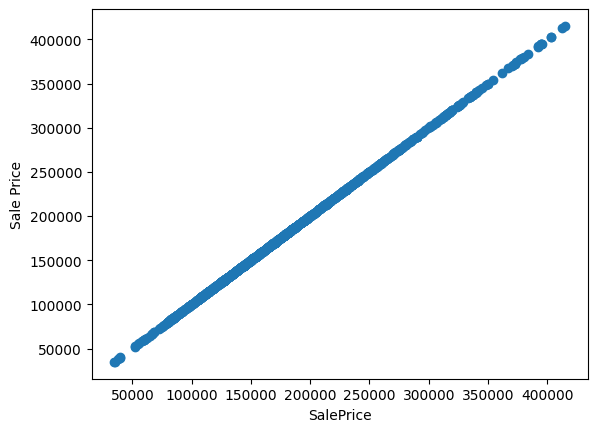

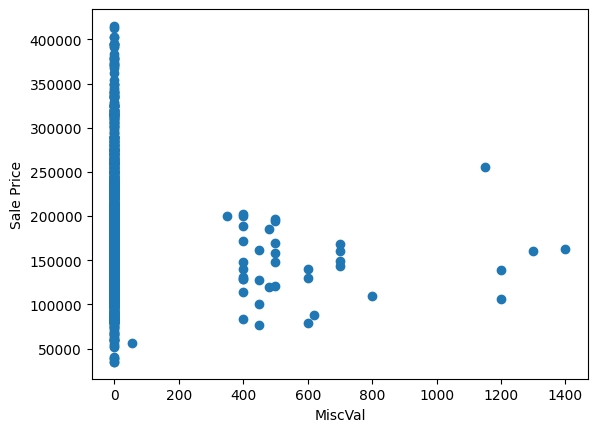

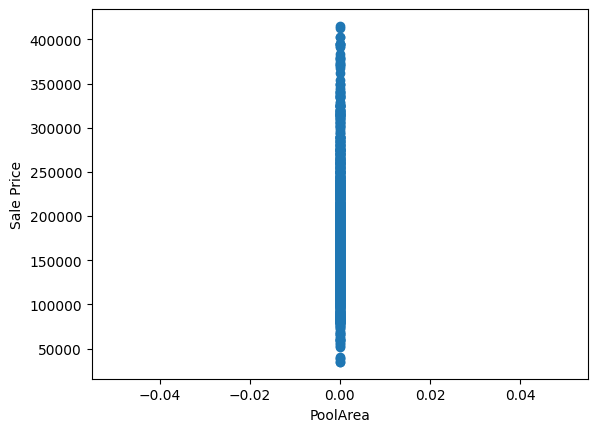

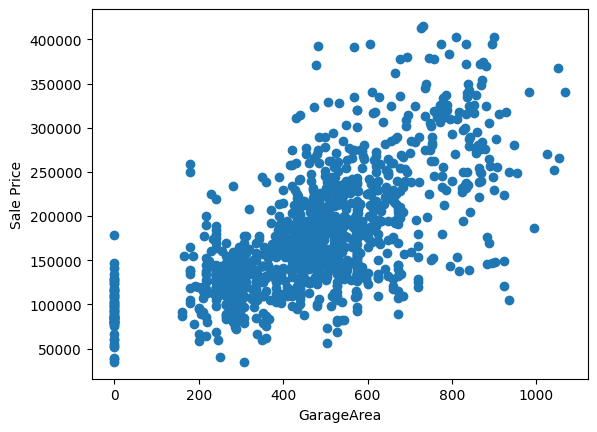

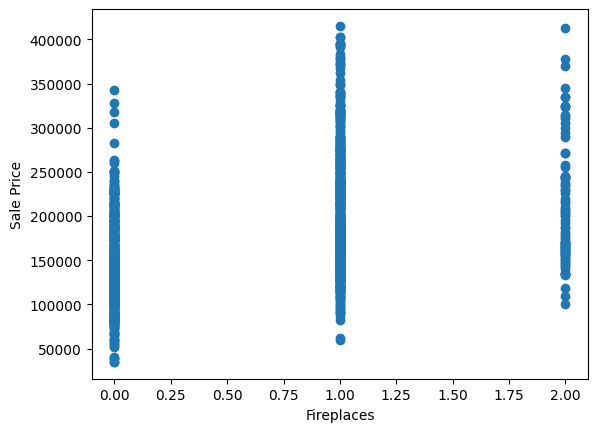

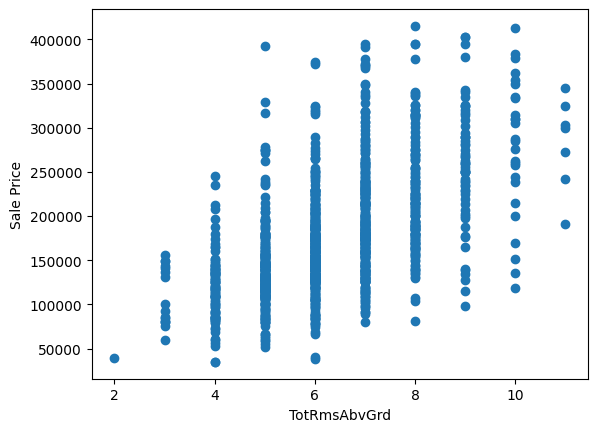

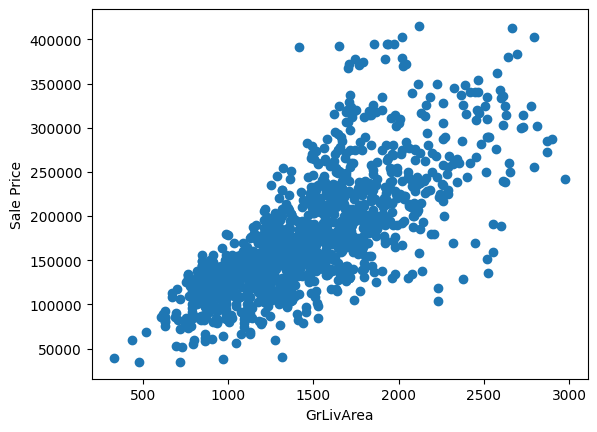

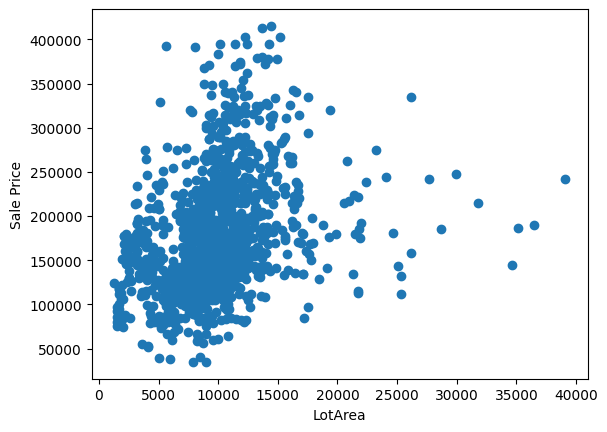

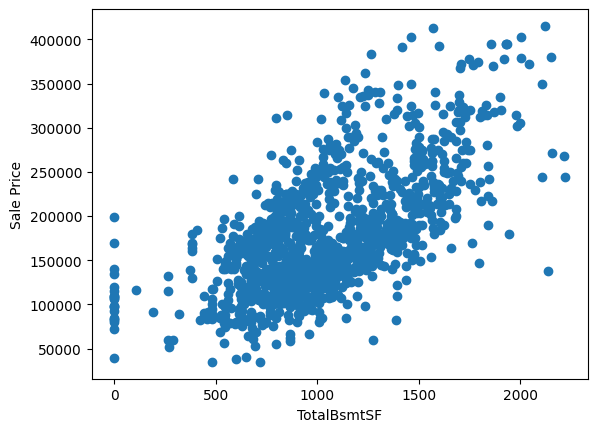

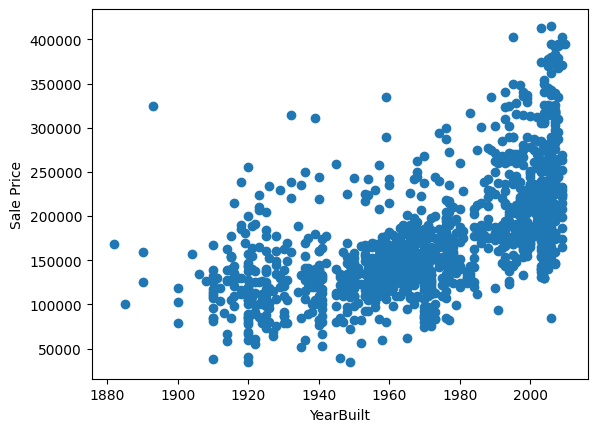

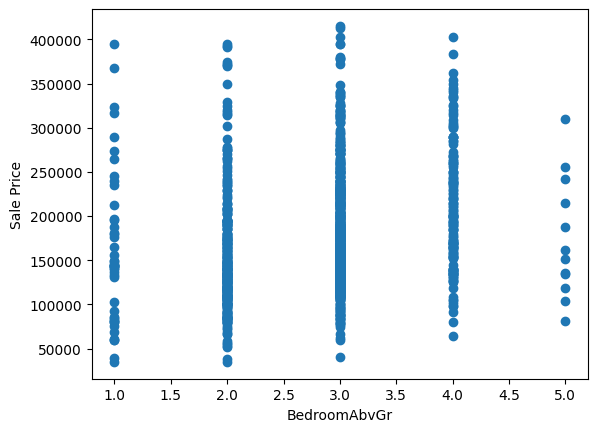

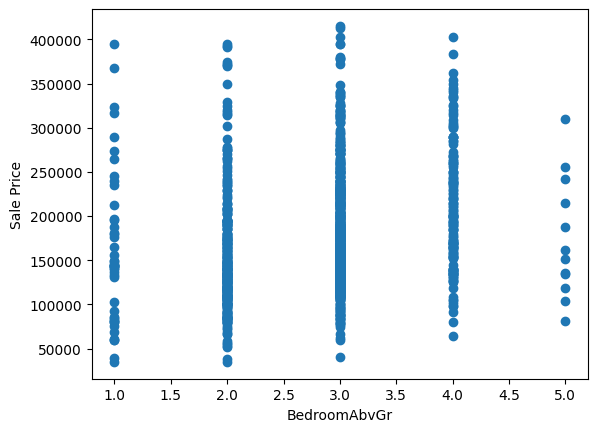

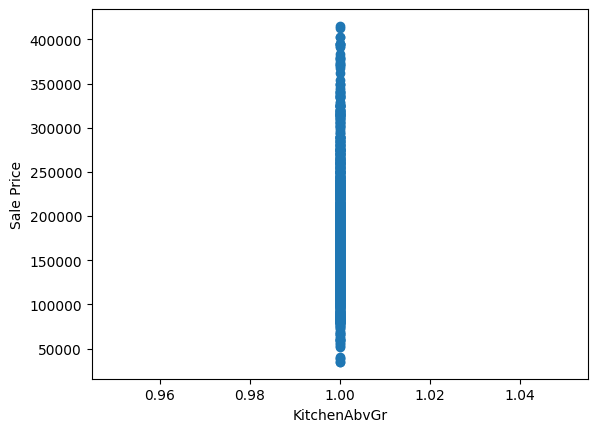

In [ ]:
# Riley
# numeric columns scatter plot with sale price
for feat in numeric:
    plt.scatter(df_no_outliers[feat], df_no_outliers['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('Sale Price')
    plt.show()

In [ ]:
# calculate the skewness and kurtosis of a numeric column
print("skewness")
print(df_no_outliers[numeric].skew())
print("kurtosis")
print(df_no_outliers[numeric].kurtosis())

skewness
SalePrice       0.959344
MiscVal         7.758726
PoolArea        0.000000
GarageArea     -0.001211
Fireplaces      0.507347
TotRmsAbvGrd    0.391431
GrLivArea       0.584158
LotArea         1.594694
TotalBsmtSF     0.269636
YearBuilt      -0.532732
BedroomAbvGr   -0.141578
BedroomAbvGr   -0.141578
KitchenAbvGr    0.000000
dtype: float64
kurtosis
SalePrice        0.913957
MiscVal         69.694602
PoolArea         0.000000
GarageArea       0.366395
Fireplaces      -0.633349
TotRmsAbvGrd     0.299258
GrLivArea        0.126856
LotArea          7.456269
TotalBsmtSF      0.531679
YearBuilt       -0.705176
BedroomAbvGr     0.569129
BedroomAbvGr     0.569129
KitchenAbvGr     0.000000
dtype: float64


In [ ]:
# calculate correlation matrix between numeric columns
cmat = df_no_outliers[numeric].corr().abs()
c_values = cmat.unstack()
print(c_values.sort_values(kind="quicksort")[80:110])

#print(df_no_outliers[numeric].corr())

Fireplaces    GrLivArea       0.461387
GrLivArea     Fireplaces      0.461387
TotalBsmtSF   GarageArea      0.480793
GarageArea    TotalBsmtSF     0.480793
GrLivArea     GarageArea      0.481817
GarageArea    GrLivArea       0.481817
YearBuilt     GarageArea      0.514012
GarageArea    YearBuilt       0.514012
BedroomAbvGr  GrLivArea       0.543949
              GrLivArea       0.543949
GrLivArea     BedroomAbvGr    0.543949
              BedroomAbvGr    0.543949
SalePrice     TotRmsAbvGrd    0.581573
TotRmsAbvGrd  SalePrice       0.581573
SalePrice     YearBuilt       0.596869
YearBuilt     SalePrice       0.596869
TotalBsmtSF   SalePrice       0.633801
SalePrice     TotalBsmtSF     0.633801
              GarageArea      0.668028
GarageArea    SalePrice       0.668028
BedroomAbvGr  TotRmsAbvGrd    0.668082
TotRmsAbvGrd  BedroomAbvGr    0.668082
              BedroomAbvGr    0.668082
BedroomAbvGr  TotRmsAbvGrd    0.668082
GrLivArea     SalePrice       0.741323
SalePrice     GrLivArea  

Drop columns that doesn't have predictive value

In [ ]:
# Keep only columns that have predictive value
# OverallQual, GrLivArea, GarageArea, TotalBsmtSF, FullBath, TotRmsAbvGrd, YearBuilt, LotArea, Neighborhood, BldgType
df_selected_columns = df_no_outliers[['SalePrice','OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'LotArea', 'Neighborhood', 'BldgType']]
df_selected_columns.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea,Neighborhood,BldgType
0,208500,7,1710,548,856,2,8,2003,8450,CollgCr,1Fam
1,181500,6,1262,460,1262,2,6,1976,9600,Veenker,1Fam
2,223500,7,1786,608,920,2,6,2001,11250,CollgCr,1Fam
3,140000,7,1717,642,756,1,7,1915,9550,Crawfor,1Fam
4,250000,8,2198,836,1145,2,9,2000,14260,NoRidge,1Fam


Encoding

In [ ]:
# encode categorical variables using one-hot encoding
# categorical variables: Neighborhood, BldgType
df_encoding = pd.get_dummies(df_selected_columns, columns=['Neighborhood', 'BldgType'], prefix=['Neighborhood', 'BldgType'])
print(df_encoding.head())


   SalePrice  OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  \
0     208500            7       1710         548          856         2   
1     181500            6       1262         460         1262         2   
2     223500            7       1786         608          920         2   
3     140000            7       1717         642          756         1   
4     250000            8       2198         836         1145         2   

   TotRmsAbvGrd  YearBuilt  LotArea  Neighborhood_Blmngtn  ...  \
0             8       2003     8450                     0  ...   
1             6       1976     9600                     0  ...   
2             6       2001    11250                     0  ...   
3             7       1915     9550                     0  ...   
4             9       2000    14260                     0  ...   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1         

Normalization and scaling

In [ ]:
# columns need to be standardize and scale: SalePrice, GrLivArea, GarageArea, TotalBsmtSF, YearBuilt, LotArea

In [ ]:
# for any type of area min-max scaling
from sklearn.preprocessing import MinMaxScaler

df_standard = df_encoding.copy()
scaler = MinMaxScaler()
df_standard['TotalBsmtSF_scaled_minmax'] = scaler.fit_transform(df_standard[['TotalBsmtSF']])
df_standard['LotArea_scaled_minmax'] = scaler.fit_transform(df_standard[['LotArea']])
df_standard['GarageArea_scaled_minmax'] = scaler.fit_transform(df_standard[['GarageArea']])
df_standard['GrLivArea_scaled_minmax'] = scaler.fit_transform(df_standard[['GrLivArea']])

In [ ]:
# standardize sale price
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard['Price_scaled'] = scaler.fit_transform(df_standard[['SalePrice']])

In [ ]:
# year built bin- 10 bins
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
df_standard['YearBuilt_binned'] = discretizer.fit_transform(df_standard[['YearBuilt']])

In [ ]:
df_standard.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea,Neighborhood_Blmngtn,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,TotalBsmtSF_scaled_minmax,LotArea_scaled_minmax,GarageArea_scaled_minmax,GrLivArea_scaled_minmax,Price_scaled,YearBuilt_binned
0,208500,7,1710,548,856,2,8,2003,8450,0,...,0,0,0,0,0.385065,0.189133,0.512629,0.520424,0.501524,8.0
1,181500,6,1262,460,1262,2,6,1976,9600,0,...,0,0,0,0,0.567701,0.219553,0.430309,0.350983,0.091892,5.0
2,223500,7,1786,608,920,2,6,2001,11250,0,...,0,0,0,0,0.413855,0.263200,0.568756,0.549168,0.729097,7.0
3,140000,7,1717,642,756,1,7,1915,9550,0,...,0,0,0,0,0.340081,0.218231,0.600561,0.523071,-0.537728,0.0
4,250000,8,2198,836,1145,2,9,2000,14260,0,...,0,0,0,0,0.515070,0.342821,0.782039,0.704992,1.131144,7.0


In [ ]:
# keep only required columns
# SalePrice, GrLivArea, GarageArea, TotalBsmtSF, YearBuilt, LotArea
df_preprocessed_again = df_standard.drop(columns=['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'LotArea'])
df_preprocessed_again.head()

,OverallQual,FullBath,TotRmsAbvGrd,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,TotalBsmtSF_scaled_minmax,LotArea_scaled_minmax,GarageArea_scaled_minmax,GrLivArea_scaled_minmax,Price_scaled,YearBuilt_binned
0,7,2,8,0,0,0,0,0,1,0,...,0,0,0,0,0.385065,0.189133,0.512629,0.520424,0.501524,8.0
1,6,2,6,0,0,0,0,0,0,0,...,0,0,0,0,0.567701,0.219553,0.430309,0.350983,0.091892,5.0
2,7,2,6,0,0,0,0,0,1,0,...,0,0,0,0,0.413855,0.263200,0.568756,0.549168,0.729097,7.0
3,7,1,7,0,0,0,0,0,0,1,...,0,0,0,0,0.340081,0.218231,0.600561,0.523071,-0.537728,0.0
4,8,2,9,0,0,0,0,0,0,0,...,0,0,0,0,0.515070,0.342821,0.782039,0.704992,1.131144,7.0


# Part 3- Post Processing

In [ ]:
df_postprocessed = df_preprocessed_again.copy()

Collinearity

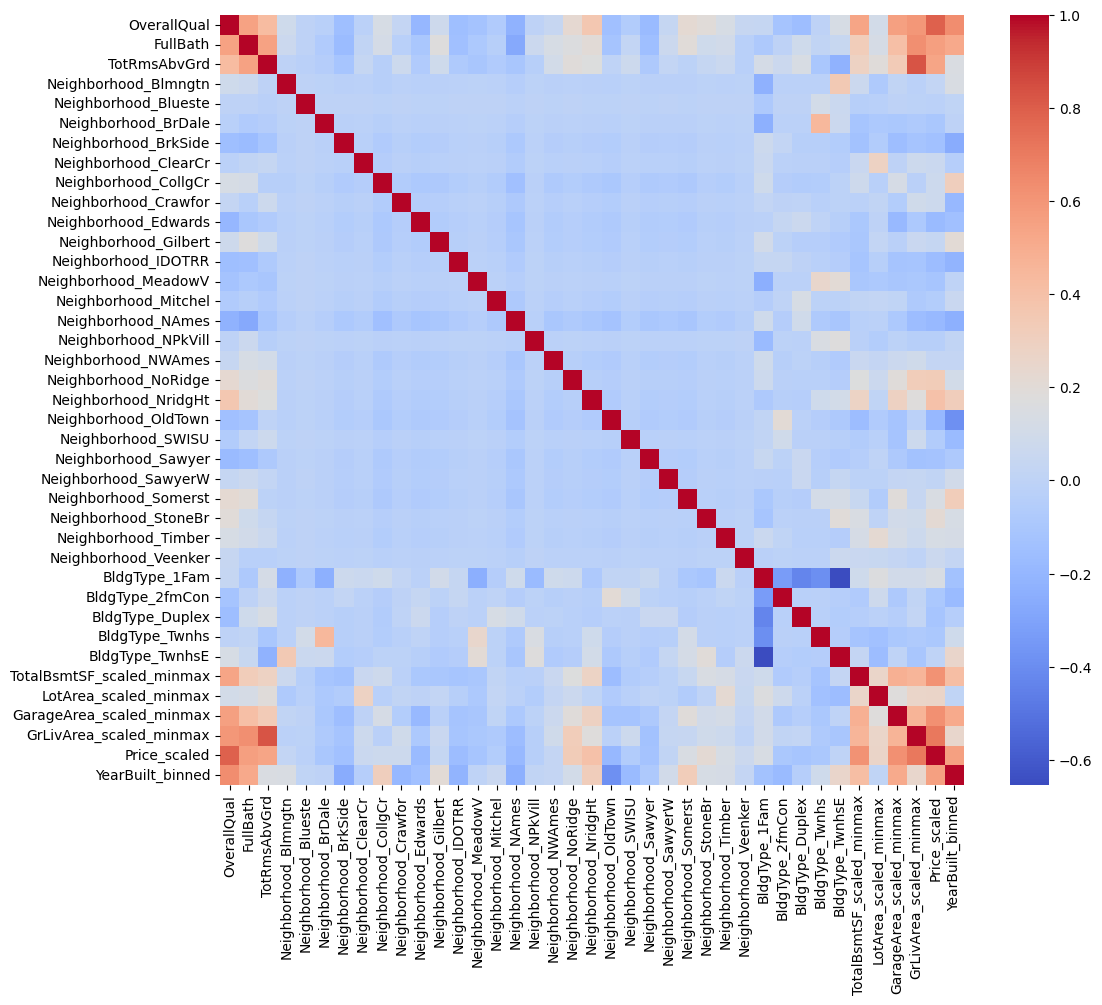

In [ ]:
# collinearity visualization
correlation_matrix = df_postprocessed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.show()

Feature Selection

In [369]:
# drop unwanted columns- multicollinearity
df_postprocessed_final = df_postprocessed.drop(columns=['GrLivArea_scaled_minmax','BldgType_1Fam'])
df_postprocessed_final.head()

,OverallQual,FullBath,TotRmsAbvGrd,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,TotalBsmtSF_scaled_minmax,LotArea_scaled_minmax,GarageArea_scaled_minmax,Price_scaled,YearBuilt_binned
0,7,2,8,0,0,0,0,0,1,0,...,0,0,0,0,0,0.385065,0.189133,0.512629,0.501524,8.0
1,6,2,6,0,0,0,0,0,0,0,...,1,0,0,0,0,0.567701,0.219553,0.430309,0.091892,5.0
2,7,2,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0.413855,0.263200,0.568756,0.729097,7.0
3,7,1,7,0,0,0,0,0,0,1,...,0,0,0,0,0,0.340081,0.218231,0.600561,-0.537728,0.0
4,8,2,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0.515070,0.342821,0.782039,1.131144,7.0
